

# project Introduction: Telecommunication Customer Churn Analysis and prediction



## Project overview

This project aims to use companies' data on customers who have churned - when customers decide to discontinue their services within, which is number one reason for loss - to synthesize business insights  on the common trends seen amongst customers who have chosen to leave the company, enabling the telecommunication companies curb the underlying reason behind customer churning. As trends are bound to change within any business, this project aims to use cutting edge machine Learning model trained on the business data to adapt and predict the possibility of churning by business customers


## Dataset
The Telco Customer Churn dataset consists of 7,043 entries with 21 features, including customer demographics (e.g., age, gender), account information (e.g., tenure, contract type), and service details (e.g., internet, streaming). The target variable 'Churn' is imbalanced, with approximately 26.5% positive cases (1,869 churners), necessitating techniques like oversampling for effective modeling. 

## Objectives
Use critical analysis to find the major features that has the highest impact on customer churning
Develop a predictive model with high recall to identify churners.
Achieve performance metrics: accuracy > 75% , Recall > 70%.
Derive business insights, such as targeting month-to-month fiber optic customers for retention.

## Approach
Data Preprocessing: Clean data, encode categoricals, scale numerics.
Exploratory Data Analysis (EDA): Visualize correlations and churn patterns.
Feature Engineering: Create features like 'HighRisk_Interaction' to enhance predictions.
Modeling: Use RandomForestClassifier with tuning and threshold adjustment.
Evaluation: Assess using confusion matrix and key metrics.


## Exploratory Data Analysis (EDA)

In this phase, we examine the dataset to uncover the underlying patterns driving customer churn. Our objective is to identify specific customer behaviors, demographics, and account features that serve as strong indicators of attrition.

**Key Objectives:**
* **Target Analysis:** Determine the overall churn rate and check for class imbalance.
* **Feature Investigation:** Analyze how different services (e.g., Internet, Security) and contract types influence a customer's decision to leave. 
    We are also going to be using this, to create augemented features that increases the likely hood of our model to predict customer churn .
* **Numerical Trends:** Examine relationships between financial factors (Monthly Charges), loyalty (Tenure), and churn.

In [3]:
import pandas as pd
import urllib

tele_churn_csv = "Telco-Customer-Churn.csv"
df_tele = pd.read_csv(tele_churn_csv)
df_tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
for column in df_tele.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_tele[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

## Dataset Overview
The dataset contains 7,043 customer records.
The dataset contains 19 independent variables, which can be classified into three main groups.

---

### Demographic Information

| Feature | Description |
|:---|:---|
| `gender` | Whether the client is a female or a male (Female, Male) |
| `SeniorCitizen` | Whether the client is a senior citizen or not (0, 1) |
| `Partner` | Whether the client has a partner or not (Yes, No) |
| `Dependents` | Whether the client has dependents or not (Yes, No) |

---

### Customer Account Information

| Feature | Description |
|:---|:---|
| `tenure` | Number of months the customer has stayed with the company (numeric) |
| `Contract` | Indicates the customers current contract type (Month-to-Month, One year, Two year) |
| `PaperlessBilling` | Whether the client has paperless billing or not (Yes, No) |
| `PaymentMethod` | The customers payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)) |
| `MonthlyCharges` | The amount charged to the customer monthly (numeric) |
| `TotalCharges` | The total amount charged to the customer (numeric) |

---

### Services Information

| Feature | Description |
|:---|:---|
| `PhoneService` | Whether the client has a phone service or not (Yes, No) |
| `MultipleLines` | Whether the client has multiple lines or not (No phone service, No, Yes) |
| `InternetService` | Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No) |
| `OnlineSecurity` | Whether the client has online security or not (No internet service, No, Yes) |
| `OnlineBackup` | Whether the client has online backup or not (No internet service, No, Yes) |
| `DeviceProtection` | Whether the client has device protection or not (No internet service, No, Yes) |
| `TechSupport` | Whether the client has tech support or not (No internet service, No, Yes) |
| `StreamingTV` | Whether the client has streaming TV or not (No internet service, No, Yes) |
| `StreamingMovies` | Whether the client has streaming movies or not (No internet service, No, Yes) |

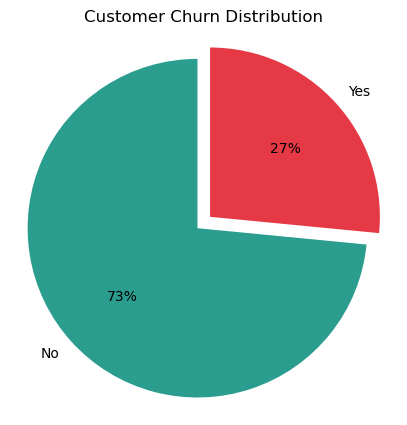

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = {"Yes": "#e63946", "No": "#2a9d8f"}
churn_counts = df_tele['Churn'].value_counts()
churn_labels = churn_counts.index

colors = [custom_palette.get(label) for label in churn_labels]
explode = [0.1 if label == 'Yes' else 0 for label in churn_labels] 

plt.figure(figsize=(5, 5))
plt.pie(churn_counts, 
        labels=churn_labels, 
        colors=colors,
        explode=explode,
        explode=explode,
        autopct='%1.0f%%',
        startangle=90)
plt.title('Customer Churn Distribution')
plt.axis('equal') 
plt.show()


### Approximately 26% of customers churned, while 74% remained.

## Dataset overview
### Class Distribution & Modeling Challenge

**Observation:**
The dataset exhibits a significant class imbalance:
* **Non-Churners:** ~74%
* **Churners:** ~26%

**Implication for Modeling:**
This imbalance creates a risk of **Model Bias**. A standard model may "overfit" to the majority class, achieving high accuracy simply by predicting "No Churn" for every customer. 

To solve this, we cannot rely on accuracy alone. We must use techniques like **Resampling (ADASYN)** and prioritize metrics like **Recall** to ensure the model actually learns to catch the churners.

## Demographic data overview

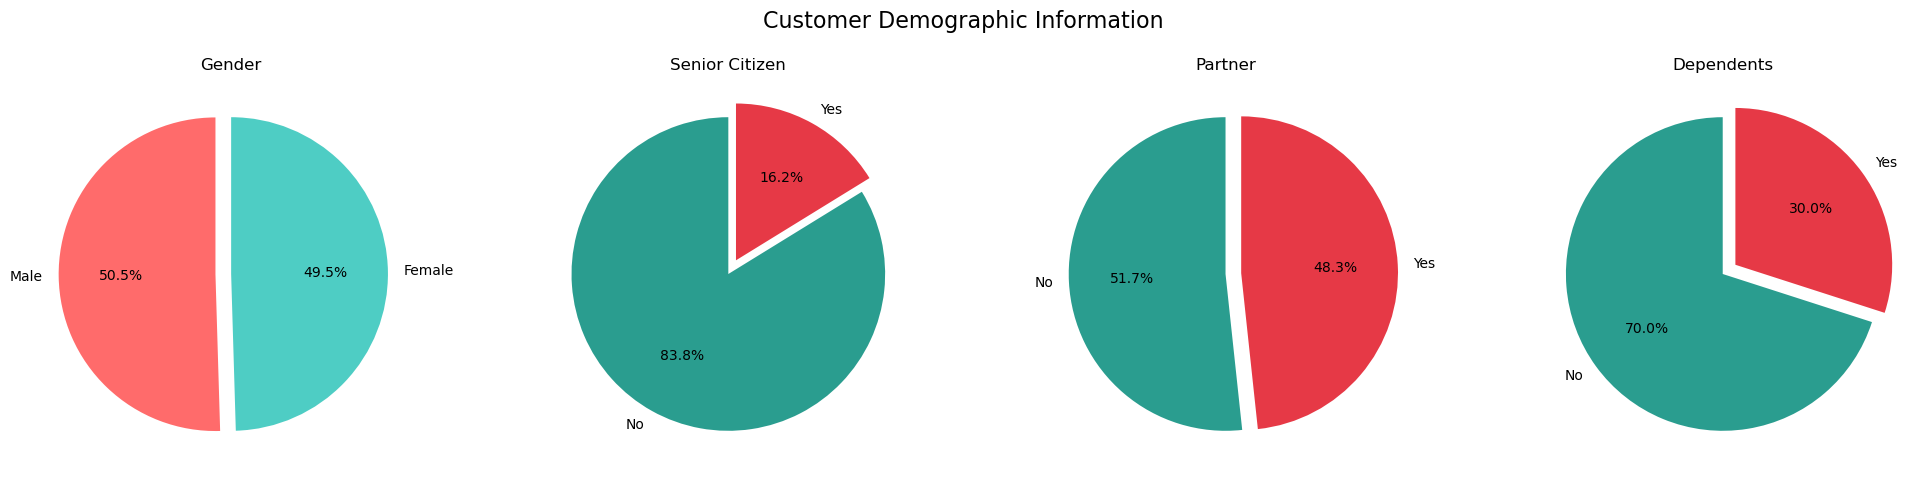

In [6]:
import matplotlib.pyplot as plt
gender_colors = ['#ff6b6b', '#4ecdc4']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Customer Demographic Information', fontsize=16)

gender_counts = df_tele['gender'].value_counts()
axes[0].pie(gender_counts, 
            labels=gender_counts.index, 
            colors=gender_colors,
            autopct='%1.1f%%', 
            startangle=90,
            explode=(0.1, 0))
axes[0].set_title('Gender')

senior_counts = df_tele['SeniorCitizen'].value_counts()
senior_labels = senior_counts.index.map({0: 'No', 1: 'Yes'})
senior_colors = [custom_palette.get(label) for label in senior_labels]
axes[1].pie(senior_counts, 
            labels=senior_labels, 
            colors=senior_colors,
            autopct='%1.1f%%', 
            startangle=90,
            explode=(0, 0.1))
axes[1].set_title('Senior Citizen')

partner_counts = df_tele['Partner'].value_counts()
partner_labels = partner_counts.index
partner_colors = [custom_palette.get(label) for label in partner_labels]
axes[2].pie(partner_counts, 
            labels=partner_labels, 
            colors=partner_colors,
            autopct='%1.1f%%', 
            startangle=90,
            explode=(0, 0.1)) 
axes[2].set_title('Partner')

dependents_counts = df_tele['Dependents'].value_counts()
dependents_labels = dependents_counts.index
dependents_colors = [custom_palette.get(label) for label in dependents_labels]
axes[3].pie(dependents_counts, 
            labels=dependents_labels, 
            colors=dependents_colors,
            autopct='%1.1f%%', 
            startangle=90,
            explode=(0, 0.1)) 
axes[3].set_title('Dependents')

# --- 7. Show the Plot ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

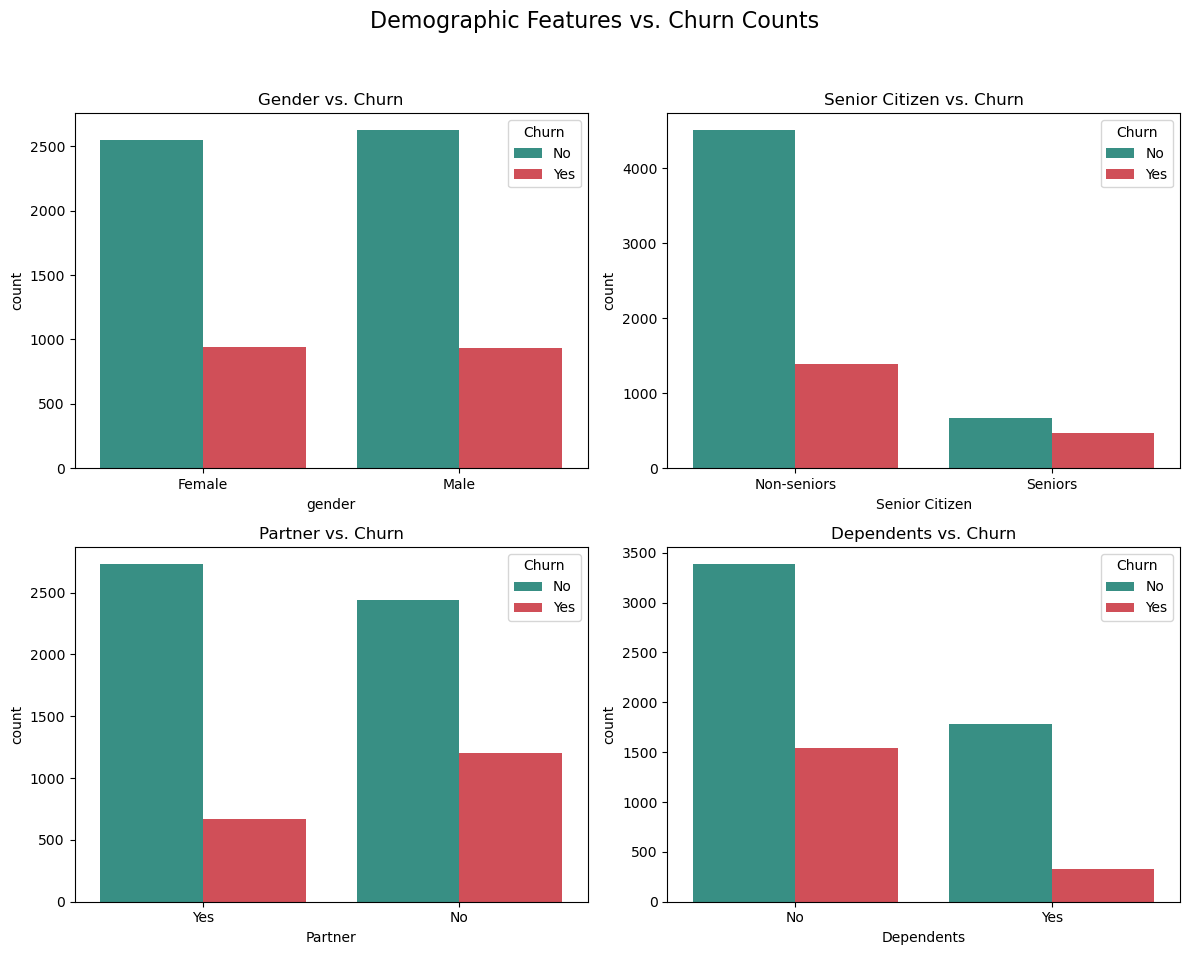

In [24]:

import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {"Yes": "#e63946", "No": "#2a9d8f"}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Demographic Features vs. Churn Counts', fontsize=16)

sns.countplot(data=df_tele, 
              x='gender', 
              hue='Churn', 
              palette=custom_palette, 
              ax=axes[0, 0])
axes[0, 0].set_title('Gender vs. Churn')


df_tele['SeniorCitizen_str'] = df_tele['SeniorCitizen'].map({0: 'Non-seniors', 1: 'Seniors'})
sns.countplot(data=df_tele, 
              x='SeniorCitizen_str', 
              hue='Churn', 
              palette=custom_palette, 
              ax=axes[0, 1])
axes[0, 1].set_title('Senior Citizen vs. Churn')
axes[0, 1].set_xlabel('Senior Citizen')


sns.countplot(data=df_tele, 
              x='Partner', 
              hue='Churn', 
              palette=custom_palette, 
              ax=axes[1, 0])
axes[1, 0].set_title('Partner vs. Churn')


sns.countplot(data=df_tele, 
              x='Dependents', 
              hue='Churn', 
              palette=custom_palette, 
              ax=axes[1, 1])
axes[1, 1].set_title('Dependents vs. Churn')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Demographic data insights :

## Gender:
A Chi-square (χ²) of 0.11 was drived from this feature. telling us that there is no statistically significant relationship between gender and churn. Both male and female customers churn at roughly the same rate. Gender therefore has negligible predictive power for customer churn rate.

## Dependents:
A Chi-square (χ²) of 69.08 was drived from this feature. Which means that This relationship is highly significant. Customers without dependents are twice as likely to churn compared to those with dependents. This suggests that dependents are a strong protective factor against churn—possibly because customers with family responsibilities prefer stability and are less likely to switch services.

## Senior citizens:
This relationship is strongly significant because it has a Chi-square (χ²) of 73.47. Senior citizens are almost twice as likely to churn compared to non-seniors. This might indicate that older customers face usability or affordability issues or possibly a genuine lack of interest.

## Partner
The relationship isn't heavily significant, possessing a Chi-square (χ²) value of 44.89. I have observed that customers with partners are less likely to churn, possibly due to shared service commitments, joint plans, or stable household situations. Having a partner appears to promote retention to some degree

Therefore taking in the two most pivotal features amongst this four, which are :
Dependents and senior citizen column.
We try and deduce the pattern amongst both of them 

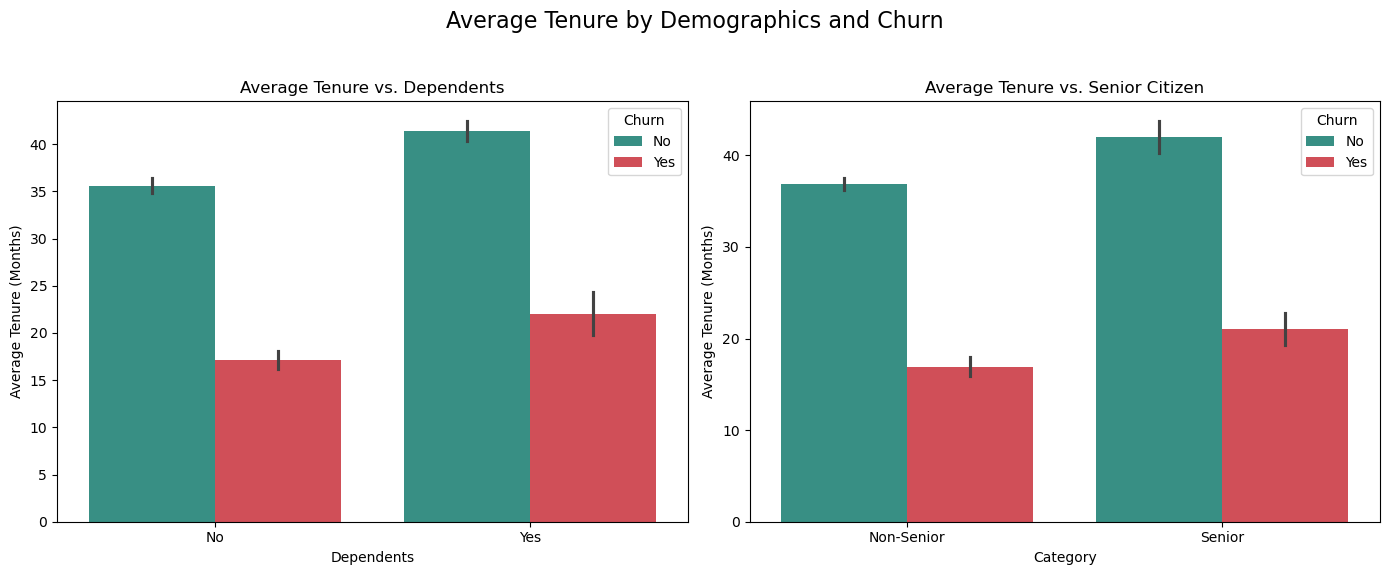

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Define Your Custom Palette ---
custom_palette = {"Yes": "#e63946", "No": "#2a9d8f"}

# --- 2. Create Figure and Subplots ---
# Create a 1x2 grid (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Average Tenure by Demographics and Churn', fontsize=16)

# --- 3. Plot 1: Tenure vs. Dependents ---
# x = Categorical feature (Dependents)
# y = Numerical feature (tenure) - the height of the bar will be the AVERAGE tenure
# hue = Churn (splits the bars and applies your colors)
sns.barplot(data=df_tele, 
            x='Dependents', 
            y='tenure', 
            hue='Churn', 
            palette=custom_palette, 
            ax=axes[0])

axes[0].set_title('Average Tenure vs. Dependents')
axes[0].set_ylabel('Average Tenure (Months)')

# --- 4. Plot 2: Tenure vs. Senior Citizen ---
# Create readable labels for the plot on the fly
df_tele['SeniorCitizen_Label'] = df_tele['SeniorCitizen'].map({0: 'Non-Senior', 1: 'Senior'})

sns.barplot(data=df_tele, 
            x='SeniorCitizen_Label', 
            y='tenure', 
            hue='Churn', 
            palette=custom_palette, 
            ax=axes[1])

axes[1].set_title('Average Tenure vs. Senior Citizen')
axes[1].set_ylabel('Average Tenure (Months)')
axes[1].set_xlabel('Category')

# --- 5. Show the Plot ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We can see that on average customers who have dependents or are seniors stay longer with companies. 

## Service and Account Data overiew
in the same fashion , we are going to look accrross the churn rate of service and account data informations, then using the aid of a the chi-square value and the bar-plot we are going to ceive out the most impactful features for the telecom-churn-model.



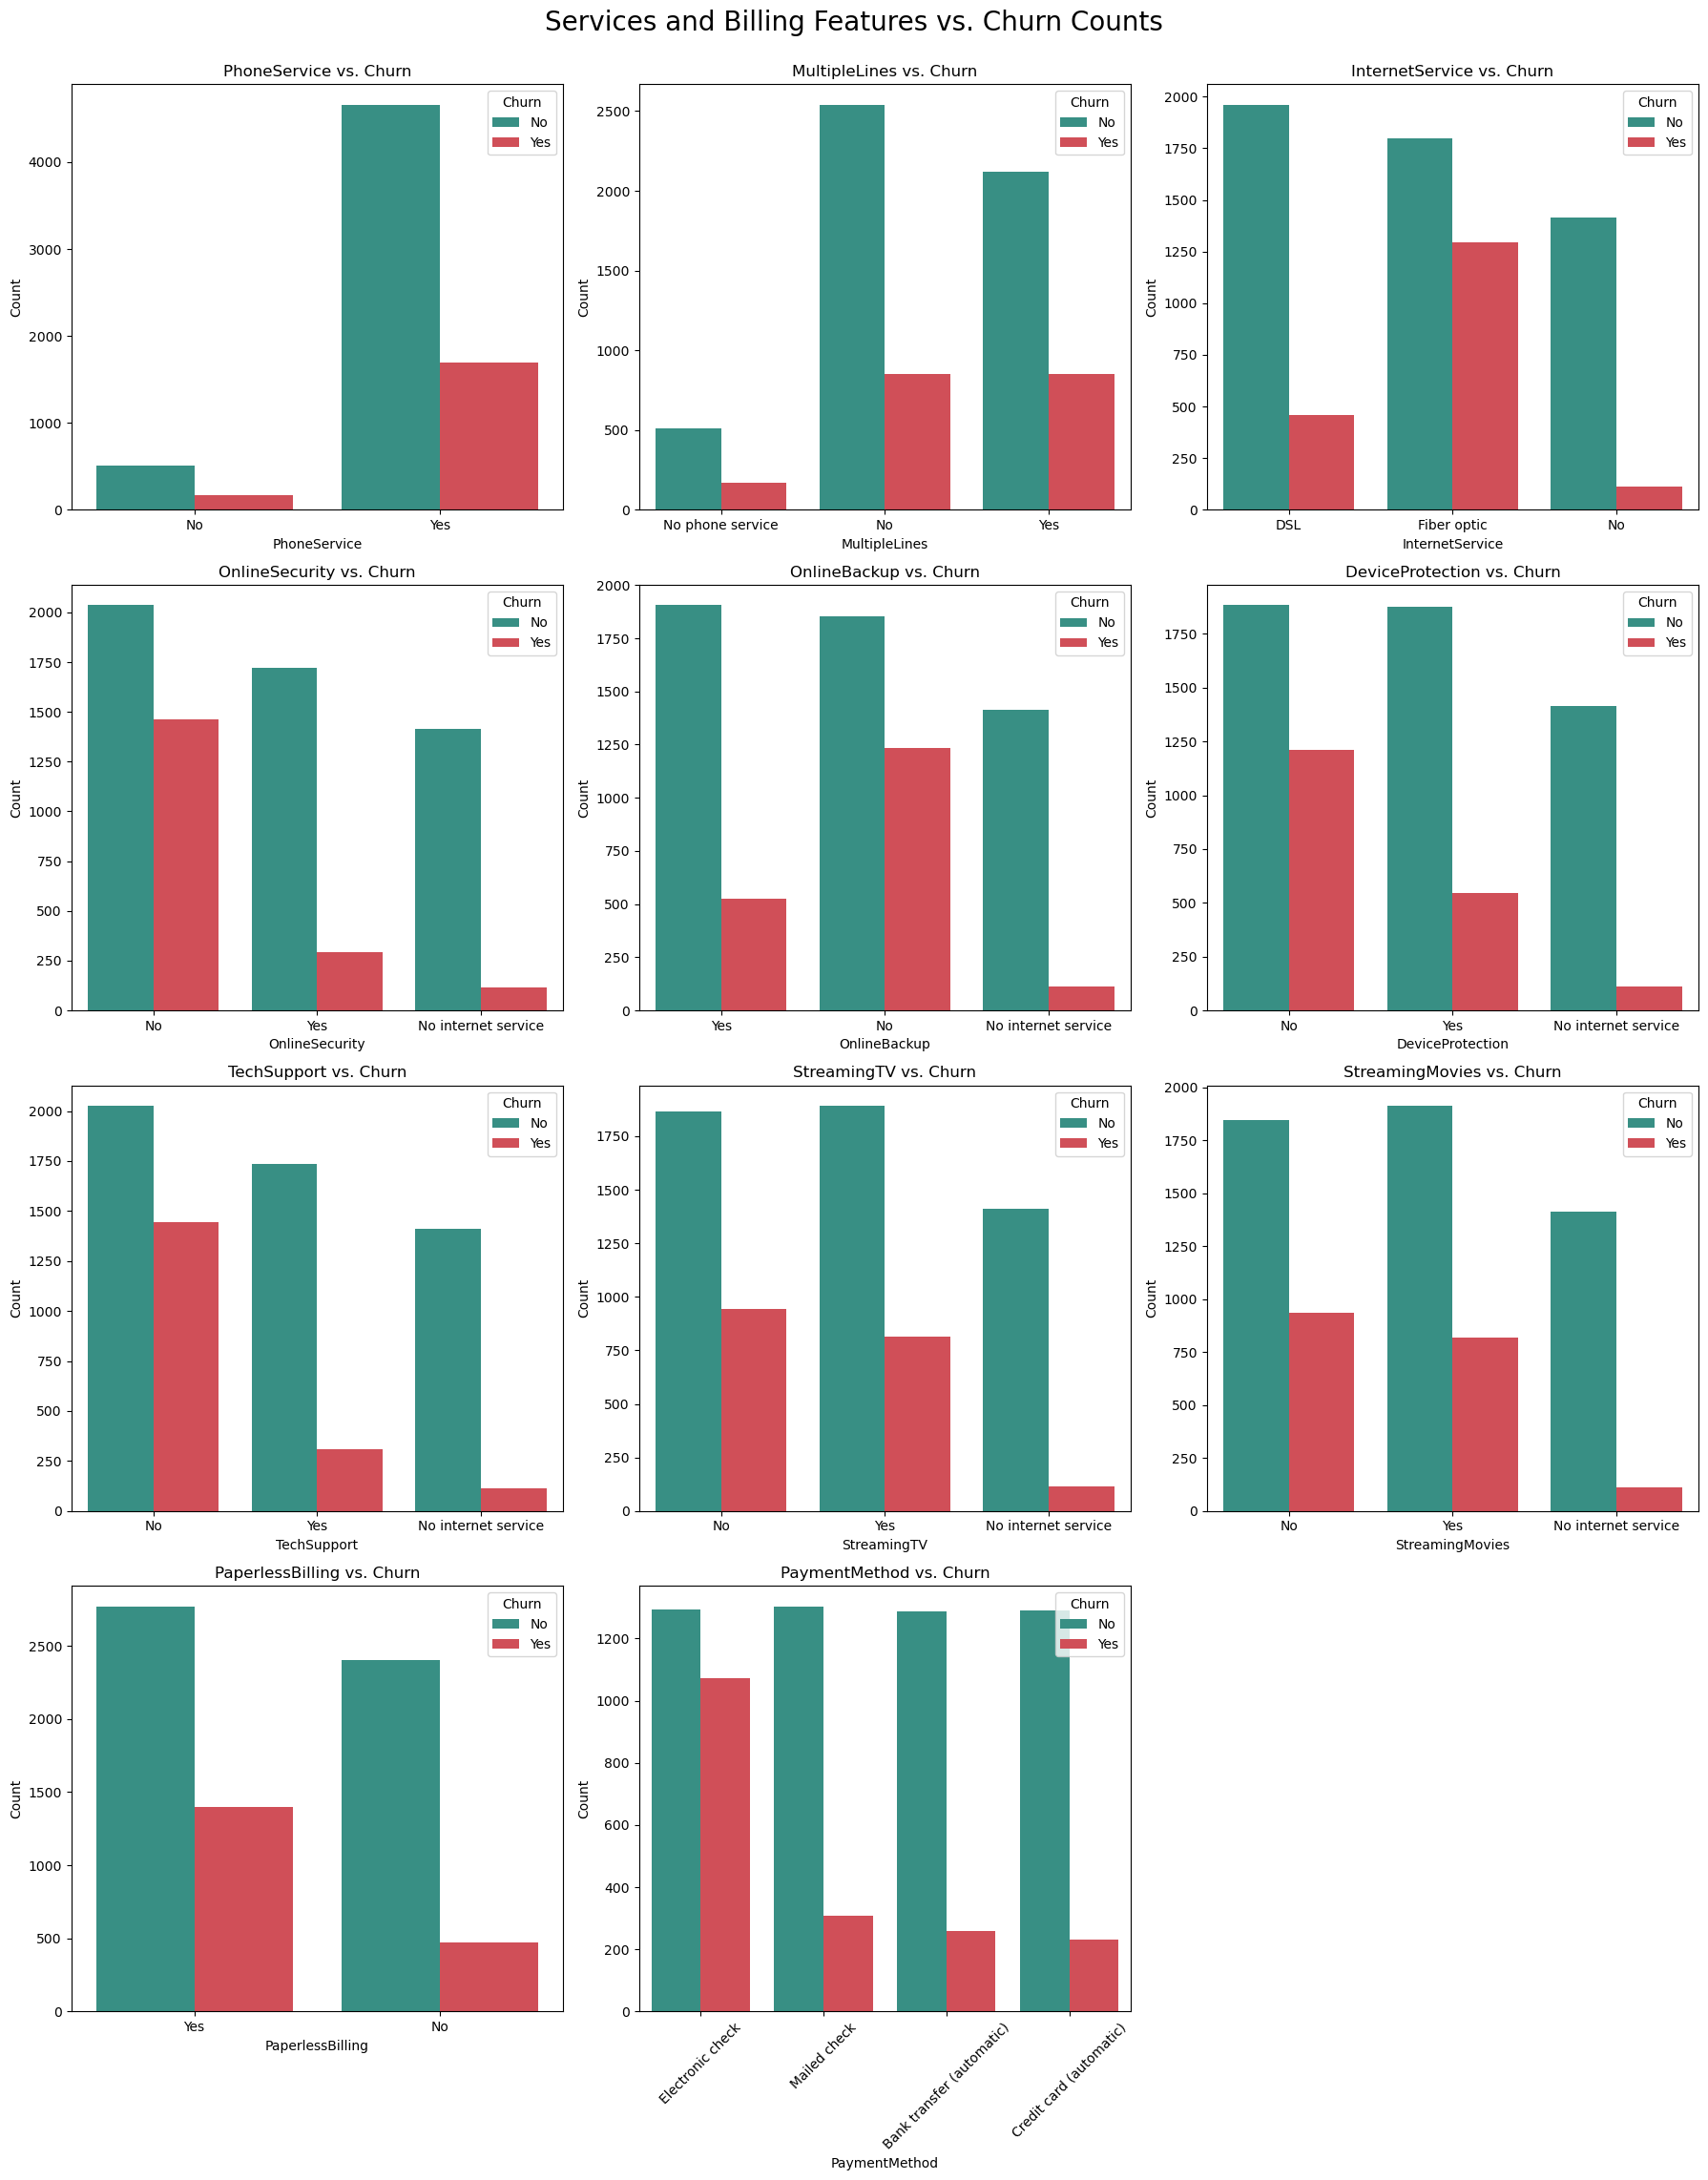

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Define Palette and Features List ---
custom_palette = {"Yes": "#e63946", "No": "#2a9d8f"}

features_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'PaperlessBilling', 'PaymentMethod'
]

# --- 2. Create Figure and Subplots ---
# We need 4 rows and 3 columns to fit 11 plots (4x3=12 slots)
# figsize is set tall (18, 24) to give each plot enough breathing room
fig, axes = plt.subplots(4, 3, figsize=(18, 24))
fig.suptitle('Services and Billing Features vs. Churn Counts', fontsize=20)

# Flatten the axes array (makes it easier to loop through: axes[0], axes[1]...)
axes_flat = axes.flatten()

# --- 3. Loop Through Features and Plot ---
for i, feature in enumerate(features_to_plot):
    sns.countplot(data=df_tele, 
                  x=feature, 
                  hue='Churn', 
                  palette=custom_palette, 
                  ax=axes_flat[i])
    
    axes_flat[i].set_title(f'{feature} vs. Churn')
    axes_flat[i].set_xlabel(feature)
    axes_flat[i].set_ylabel('Count')
    
    # Special handling for PaymentMethod: Rotate labels 45 degrees
    if feature == 'PaymentMethod':
        axes_flat[i].tick_params(axis='x', rotation=45)

# --- 4. Clean Up ---
# We have 11 plots but 12 slots. We need to delete the last empty slot (index 11).
fig.delaxes(axes_flat[11])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# Demographic data insights :

### Chi-Square Test Results: Feature Importance

| Rank | Feature | Chi-Square Value | Interpretation |
| :--- | :--- | :--- | :--- |
| 1 | **OnlineSecurity** | 850.00 | Extremely Strong Predictor |
| 2 | **TechSupport** | 828.20 | Extremely Strong Predictor |
| 3 | **InternetService** | 732.31 | Extremely Strong Predictor |
| 4 | PaymentMethod | 648.14 | Very Strong Predictor |
| 5 | OnlineBackup | 601.81 | Very Strong Predictor |
| 6 | DeviceProtection | 558.42 | Very Strong Predictor |
| 7 | StreamingMovies | 375.66 | Strong Predictor |
| 8 | StreamingTV | 374.20 | Strong Predictor |
| 9 | PaperlessBilling | 258.28 | Strong Predictor |
| 10 | MultipleLines | 11.33 | Weak Predictor |
| 11 | PhoneService | 0.92 | Not Significant |


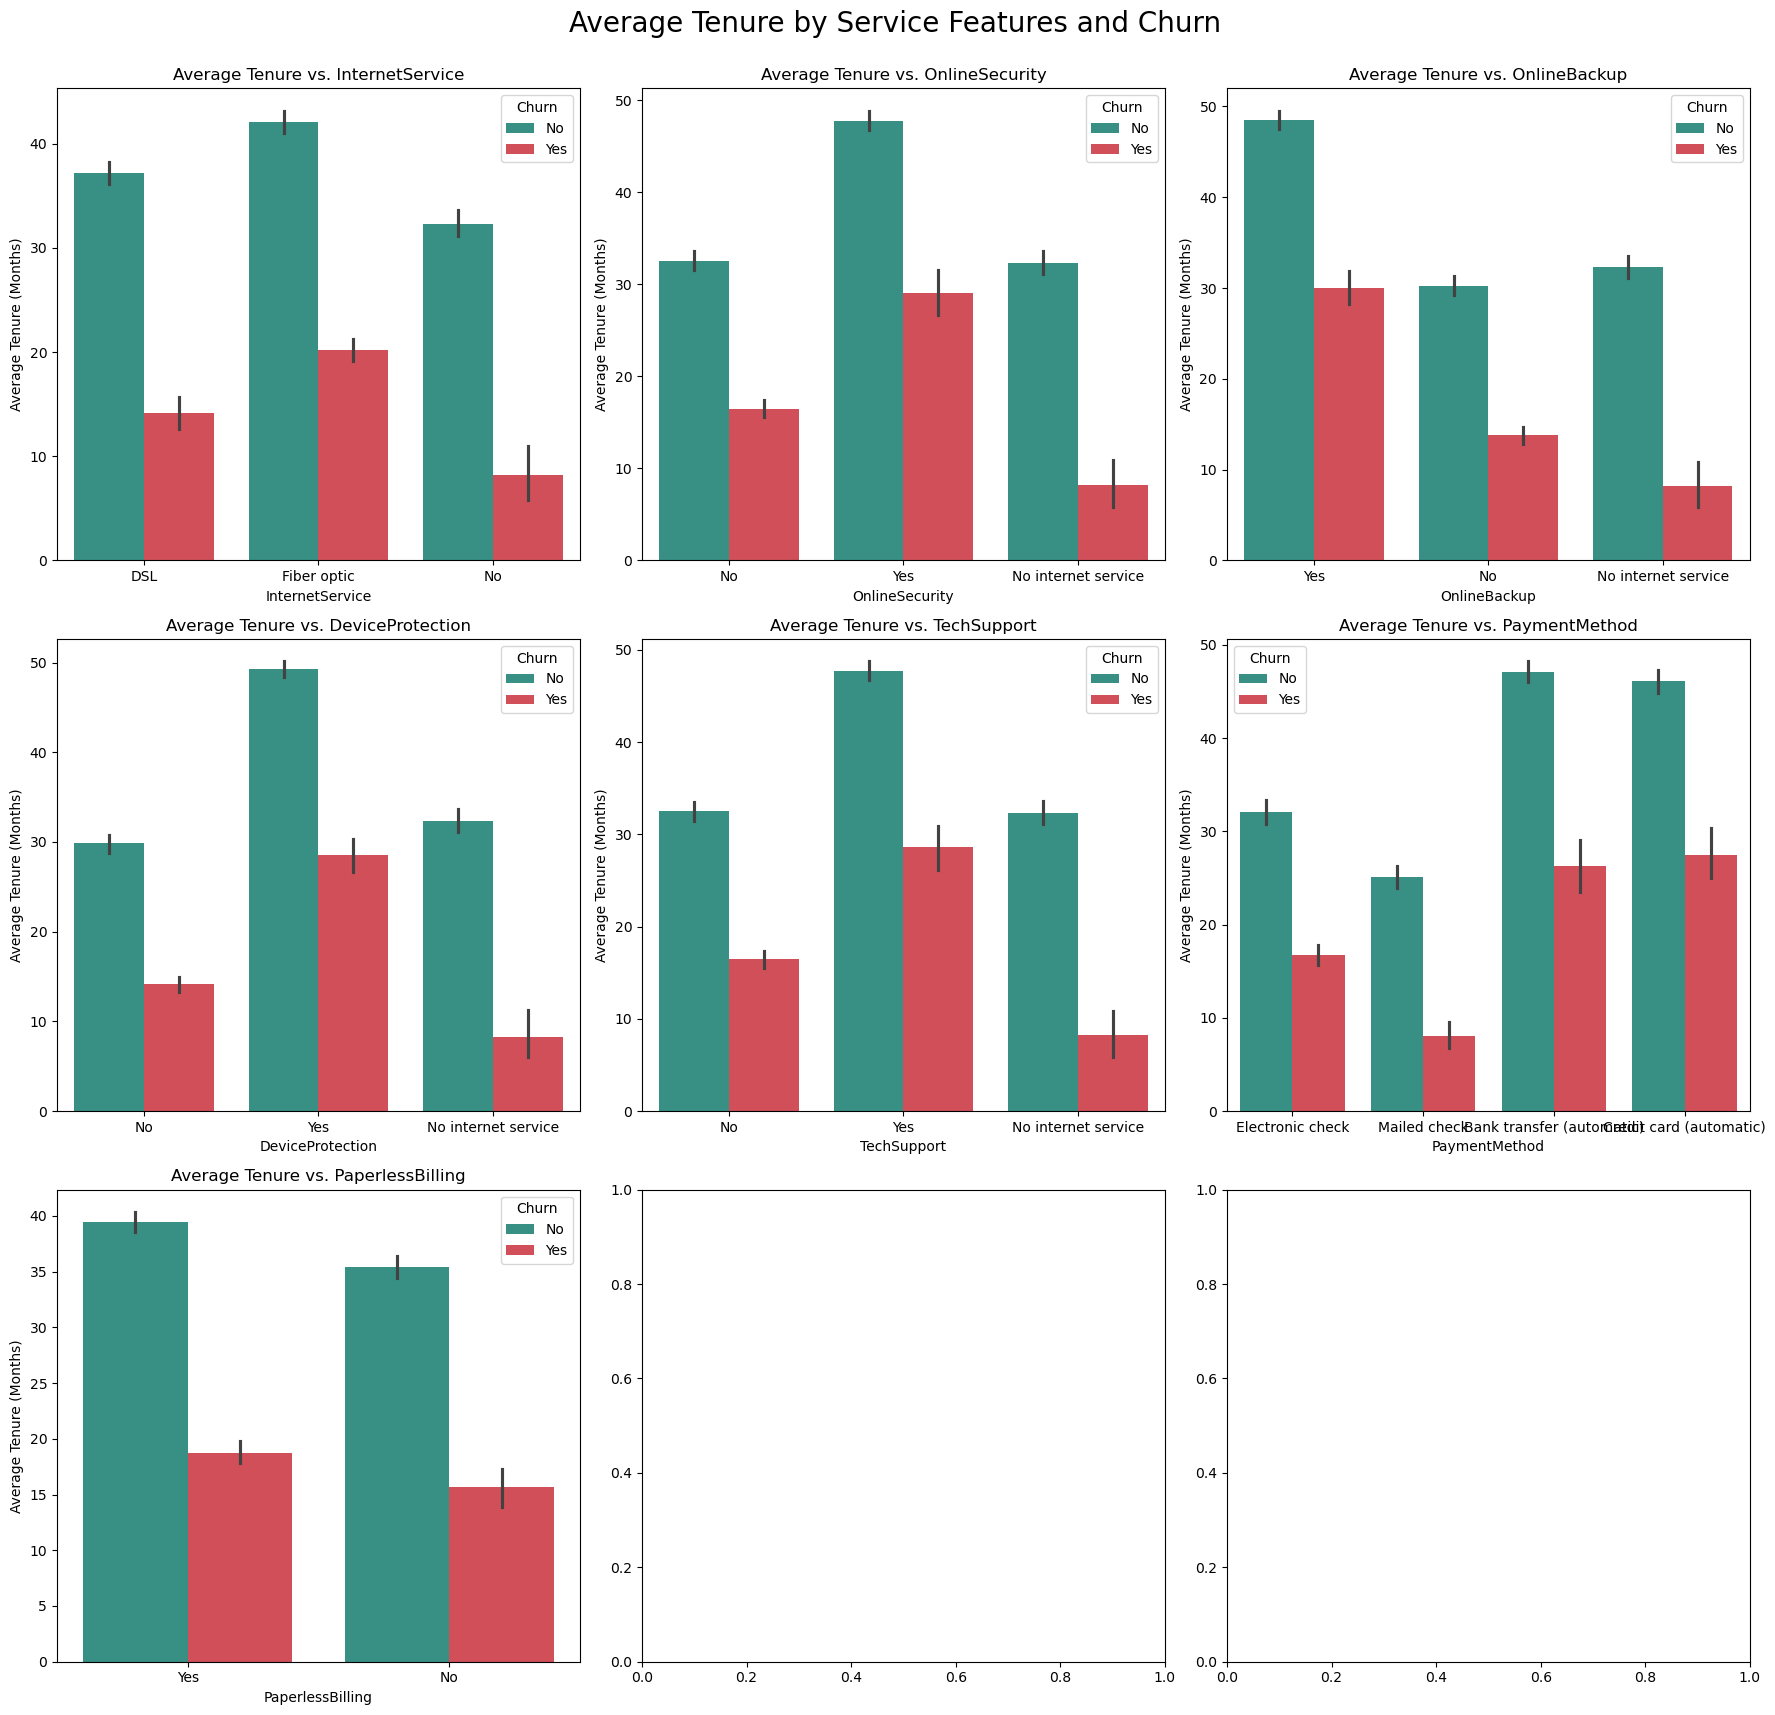

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


custom_palette = {"Yes": "#e63946", "No": "#2a9d8f"}


features_to_plot = [
  'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport','PaymentMethod', 'PaperlessBilling'
]


fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Average Tenure by Service Features and Churn', fontsize=20)


axes_flat = axes.flatten()


for i, feature in enumerate(features_to_plot):
    # sns.barplot automatically calculates the MEAN (average) of 'y'
    sns.barplot(data=df_tele, 
                x=feature, 
                y='tenure', 
                hue='Churn', 
                palette=custom_palette, 
                ax=axes_flat[i])
    
    axes_flat[i].set_title(f'Average Tenure vs. {feature}')
    axes_flat[i].set_ylabel('Average Tenure (Months)')
    axes_flat[i].set_xlabel(feature)


plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

### Key Insights: Drivers of Short Tenure & High Churn

Our analysis identified a distinct profile of customers who tend to stay for a shorter duration and have a significantly higher likelihood of churning. These high-risk customers typically share the following characteristics:

* **Internet Service:** Subscribed to **Fiber optic**.
* **Payment & Billing:** Use **Electronic check** and opt for **Paperless billing**.
* **Lack of Support Services:** Do **not** subscribe to **Tech Support**, **Device Protection**, or **Online Security**.

**Conclusion:** The presence of these specific features, particularly the lack of "sticky" support services, serves as a strong indicator of low customer loyalty.


## Loyalty imbibed Features

We are looking at loyalty-driven features. These represent the financial relationships customers have established with the company over time.

They include:
* **Tenure**
* **Contract**
* **TotalCharges**

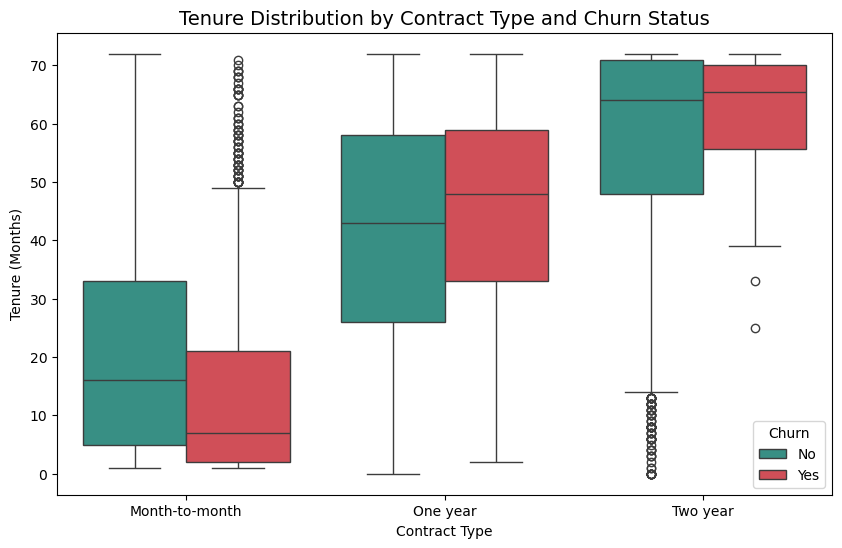

In [29]:


# --- 1. Define Your Custom Palette ---
custom_palette = {"Yes": "#e63946", "No": "#2a9d8f"}

# --- 2. Create the Plot ---
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_tele, 
            x='Contract', 
            y='tenure', 
            hue='Churn', 
            palette=custom_palette)

# --- 3. Add Labels and Title ---
plt.title('Tenure Distribution by Contract Type and Churn Status', fontsize=14)
plt.ylabel('Tenure (Months)')
plt.xlabel('Contract Type')

# --- 4. Show the Plot ---
plt.show()

We examined how customer tenure varies across different contract types to identify patterns in loyalty and attrition.

**Key Insights:**
* **Month-to-month Contracts:** This group is highly volatile. The typical churner leaves very early (median tenure < 10 months). However, the visible "outliers" reveal a specific segment of customers who stay for years without a long-term commitment before eventually leaving.
* **One-Year Contracts:** These customers exhibit good stability. Both churners and non-churners in this category tend to a relatively high tenure (median > 40 months).
* **Two-Year Contracts:** These customers exhibit high stability. Both churners and non-churners in this category tend to have very high tenure (median > 60 months).
* **Overall Trend:** There is a strong positive correlation between contract length and tenure. As commitment length increases, customer longevity significantly increases.

### EDA Summary & Strategic Plan

Our analysis has established a clear profile for high-risk customers.

**Top 5 Drivers of Churn:**
1.  **Contract:** Month-to-month contracts are the single strongest predictor of churn.
2.  **Tenure:** New customers (0-12 months) are extremely volatile.
3.  **Internet Service:** Fiber Optic users churn at a much higher rate than DSL users.
4.  **Payment:** Electronic check payments are linked to significantly higher attrition.
5.  **Support:** Customers without Tech Support or Online Security lack "stickiness" and leave often.

**Next Steps:**
* **Data Cleaning:** Convert `TotalCharges` to numeric format.
* **Preprocessing:** Handle the class imbalance (73% vs 23%) using ADASYN to sample and induce balance to ensure the model learns to identify churners effectively.
* ## Feature Engineering

Based on insights from our EDA, we created four new features to explicitly highlight high-risk patterns and customer segments for the model.

| Feature Name | Logic | Purpose |
| :--- | :--- | :--- |
| **`Tenure_Group`** | Bins `tenure` into three categories: *New*, *Established*, and *Loyal*. | To model risk based on specific customer lifecycle stages rather than just raw time. |
| **`HighRisk_Interaction`** | Flags customers with **Month-to-month** contracts AND **Fiber optic** internet. | Isolates the combination of the two highest-risk factors identified in EDA. |
| **`Fiber_Electronic`** | Flags customers with **Fiber optic** internet AND **Electronic check** payment. | Captures the specific intersection of service type and payment method associated with high churn. |
| **`Tenure_MonthlyCharges`** | Multiplies `tenure` by `MonthlyCharges`. | Captures the interaction between a customer's loyalty (time) and their financial weight (cost). |

# MODEL DEVELOPMENT 

## Importation of Dataset


In [19]:
from itertools import groupby
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


filename = "Telco-Customer-Churn.csv"
df_tele = pd.read_csv(filename)

df_tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
print(df_tele.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


## Cleaning and Normlization of dataset 

In [7]:
# handling missing values in totalcharges columns
df_tele["TotalCharges"] = df_tele["TotalCharges"].replace(" ", np.nan)
df_tele.dropna(subset=["TotalCharges"], inplace=True)
df_tele["TotalCharges"] = pd.to_numeric(df_tele["TotalCharges"])

# dropping all redundant feeatures 
# df_tele.drop(["PhoneService", "customerID"], axis=1, inplace=True)

# normalization of datatypes
bool_cols = df_tele.select_dtypes(include = "bool").columns
df_tele[bool_cols] = df_tele[bool_cols].astype(int)
df_tele["tenure"] = df_tele["tenure"].astype(float)

# gathering all numerical data for feature scaling 
all_numerical_features = df_tele.select_dtypes(include = np.number).columns.tolist()
needed_numerical_feature = [feature for feature in all_numerical_features if df_tele[feature].nunique()>2]



## Feature Engineering 

In [8]:
# classfiying customer loyalty based on tenure cardinality
bins = [0, 15, 48, 73]
labels = ["New_customers", "Established_customers", "Loyal_customers"]
df_tele['Tenure_Group'] = pd.cut(df_tele['tenure'], bins=bins, labels=labels, right=False)

# coupling high determinant deafeaturestogethe r
df_tele['HighRisk_Interaction'] = ((df_tele['Contract'] == 'Month-to-month') &
                                   (df_tele['InternetService'] == 'Fiber optic')).astype(int)

df_tele['Tenure_MonthlyCharges'] = df_tele['tenure'] * df_tele['MonthlyCharges']

df_tele['Fiber_Electronic'] = ((df_tele['InternetService'] == 'Fiber optic') &
                               (df_tele['PaymentMethod'] == 'Electronic check')).astype(int)

## Futher data normalization

In [10]:
# one hot key encoding all features 
encoded_df_tele = pd.get_dummies(df_tele, drop_first=True)

# Ensure boolean columns are integers
bool_cols = encoded_df_tele.select_dtypes(include="bool").columns
encoded_df_tele[bool_cols] = encoded_df_tele[bool_cols].astype(int)

# Ensure tenure is float
encoded_df_tele["tenure"] = encoded_df_tele["tenure"].astype(float)

## Data preparation and numerical scaling 

In [11]:
# Split Data
labels = encoded_df_tele["Churn_Yes"]
features = encoded_df_tele.drop("Churn_Yes", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#  Scaling
# Identify numerical features with more than 2 unique values
all_numerical_features = encoded_df_tele.select_dtypes(include=np.number).columns.tolist()
needed_numerical_feature = [feature for feature in all_numerical_features if encoded_df_tele[feature].nunique() > 2]

scaler = StandardScaler()
X_train[needed_numerical_feature] = scaler.fit_transform(X_train[needed_numerical_feature])
X_test[needed_numerical_feature] = scaler.transform(X_test[needed_numerical_feature])

## Resmapling of data

In [17]:
adasyn = ADASYN(random_state=42)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train, y_train)

# Model training 

In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [{0: 1, 1: 1.5}]
}

grid_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    random_state=42,
    n_iter=20
)

print("Starting training...")
grid_search.fit(X_train_bal, y_train_bal)
best_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation F1 Score: {grid_search.best_score_:.4f}")

y_prob = best_model.predict_proba(X_test)[:, 1]
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# Metrics
print("\n--- Model Performance (Threshold: 0.5) ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"Confusion Matrix: [TN={tn}, FP={fp}, FN={fn}, TP={tp}]")

Starting training...
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': {0: 1, 1: 1.5}}
Best Cross-Validation F1 Score: 0.8285

--- Model Performance (Threshold: 0.4) ---
Accuracy:  0.7569
Recall:    0.6310
Precision: 0.5364
F1 Score:  0.5799
Confusion Matrix: [TN=829, FP=204, FN=138, TP=236]
